In [14]:
# Import part
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter

from string import ascii_letters

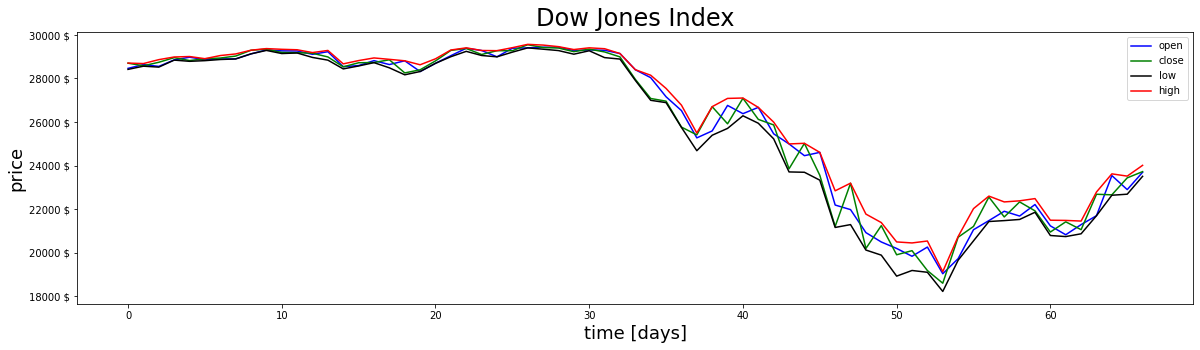

In [3]:
path1 = "^DJI.csv"
df = pd.read_csv(path1)
df.describe()
#df.info()
df = df.iloc[184:253,:]
df

plt.figure(figsize=(20, 5))
plt.subplot(1,1,1)
plt.plot(df.Open.values,color='blue',label='open')  #df.Open.values transfered the pd series into np array
plt.plot(df.Close.values,color='green',label='close')
plt.plot(df.Low.values,color='black',label='low')
plt.plot(df.High.values,color='red',label='high')
#plt.plot(df.Volume.values,color='black',label='volume weighted average price')

font_xy = {'family' : 'cursive','stretch': 'ultra-condensed', 'weight' : 'normal','size'   : 36,}



#plt.plot(get_xy("MMM.csv")[0],get_xy("MMM.csv")[1],c = "red",label = "McDonald's")
plt.title('Dow Jones Index',fontsize=24)
plt.xlabel('time [days]',fontsize=18)

plt.ylabel('price',fontsize=18)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d $'))
plt.legend(loc='best')
plt.show()

The Biggest Loss date is: 231   2020-03-16
Name: Date, dtype: datetime64[ns]


(array([737439., 737456., 737470., 737485., 737499., 737516., 737530.]),
 <a list of 7 Text major ticklabel objects>)

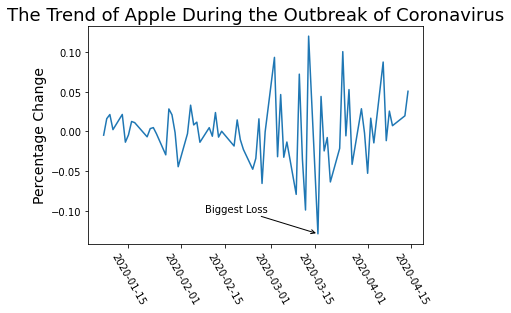

In [4]:
path2 = "AAPL.csv"
AAPL = pd.read_csv(path2,parse_dates = ["Date"])

AAPL_corona = AAPL.iloc[183:253,0:6]
AAPL_corona


AAPL_corona_adj = AAPL_corona.iloc[:,5:6] # only choosing the adjusted close column
#print(aapl_corona_adj)
AAPL_corona_adj['Adj Close'] = AAPL_corona_adj['Adj Close'].astype(float) # changing the type

AAPL_percentage_change = AAPL_corona_adj.pct_change()  #calculating the percentage changes based on each day
AAPL_corona["percentage_change"] = AAPL_percentage_change


AAPL_min_one = AAPL_corona_adj.pct_change().min()
mask = AAPL_corona["percentage_change"].isin([AAPL_min_one])
date = AAPL_corona[mask]["Date"]
AAPL_min_changing_date = date

print("The Biggest Loss date is:",str(AAPL_min_changing_date))

#myFmt = mdates.DateFormatter('%d')
#ax.xaxis.set_major_formatter(myFmt)

for i in range(len(AAPL_corona["Date"])):
    AAPL_corona["Date"] 

fig, ax = plt.subplots()
ax.plot(AAPL_corona["Date"],AAPL_percentage_change)

ax.annotate('Biggest Loss',
           xy=(AAPL_min_changing_date, AAPL_min_one), xycoords='data',
           xytext=(-50, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"),horizontalalignment='right', verticalalignment='top',)
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('The Trend of Apple During the Outbreak of Coronavirus',fontsize=18)

plt.ylabel("Percentage Change",fontsize=14)

#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d '))

plt.savefig("/Users/Augustine/Desktop/CMSE402/semester-project-wangha56/draft_visualizations/data_notebook_ plots/aapl.png")
plt.xticks(rotation = 300)



In [5]:
def get_each_stock_plot(file_name):
    path = str(file_name)
    data = pd.read_csv(path,parse_dates = ["Date"])
    
    data_corona = data.iloc[183:253,0:6]
    data_corona
    data_corona_adj = data_corona.iloc[:,5:6] # only choosing the adjusted close column
    #print(aapl_corona_adj)
    data_corona_adj['Adj Close'] = data_corona_adj['Adj Close'].astype(float) # changing the type
    percentage_change = data_corona_adj.pct_change()  #calculating the percentage changes based on each day
    data_corona["percentage_change"] = percentage_change

    min_one = data_corona_adj.pct_change().min()
    mask = data_corona["percentage_change"].isin([min_one])

    date = data_corona[mask]["Date"]

    min_changing_date = date

    #Plotting
    fig, ax = plt.subplots()
    #myFmt = mdates.DateFormatter('%d')
    #ax.xaxis.set_major_formatter(myFmt)
    ax.plot(data_corona["Date"],percentage_change)

    ax.annotate('Biggest Loss',
               xy=(min_changing_date,min_one), xycoords='data',
               xytext=(-50, 30), textcoords='offset points',
                arrowprops=dict(arrowstyle="->"),horizontalalignment='right', verticalalignment='top',)

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.set_title(path)
    plt.xticks(rotation = 300)

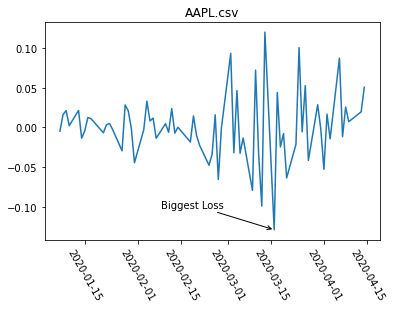

In [6]:
get_each_stock_plot("AAPL.csv")
#get_each_stock_plot("BA.csv")
#get_each_stock_plot("CSCO.csv")
#DOW = get_each_stock_plot("DOW.csv")
#JPM = get_each_stock_plot("JPM (2).csv")
#MMM = get_each_stock_plot("MMM.csv")
#HD = get_each_stock_plot("HD.csv")

In [7]:
def get_xy(file_name):
    path = str(file_name)
    data = pd.read_csv(path,parse_dates = ["Date"])
    
    data_corona = data.iloc[183:253,0:6]
    data_corona
    data_corona_adj = data_corona.iloc[:,5:6] # only choosing the adjusted close column
    #print(aapl_corona_adj)
    data_corona_adj['Adj Close'] = data_corona_adj['Adj Close'].astype(float) # changing the type
    percentage_change = data_corona_adj.pct_change()  #calculating the percentage changes based on each day
    data_corona["percentage_change"] = percentage_change

    min_one = data_corona_adj.pct_change().min()
    mask = data_corona["percentage_change"].isin([min_one])

    date = data_corona[mask]["Date"]

    min_changing_date = date
    
    return data_corona["Date"],percentage_change


#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
#fig.suptitle('Four Biggest Drop in Dow Jones')
#ax1.plot(get_xy("MMM.csv")[0],get_xy("MMM.csv")[1],'tab:blue')
#ax2.plot(get_xy("AXP.csv")[0],get_xy("AXP.csv")[1],'tab:orange')
#ax3.plot(get_xy("HD.csv")[0],get_xy("HD.csv")[1],'tab:green')
#ax4.plot(get_xy("JPM (2).csv")[0],get_xy("JPM (2).csv")[1], 'tab:red')

#for ax in fig.get_axes():
    #ax.label_outer()
#plt.xticks(rotation = 300)

In [8]:
def get_infor(file_name):
    path = str(file_name)
    #path = str(file_name)
    data = pd.read_csv(path,parse_dates = ["Date"])
    data_corona = data.iloc[183:253,0:6] #choosing the data from 1.6 - 4.12 2020, which is the start date of Coronvairus to now.
    data_corona
    
    data_corona_adj = data_corona.iloc[:,5:6] # only choosing the adjusted price of each stock close column
    #print(aapl_corona_adj)
    data_corona_adj['Adj Close'] = data_corona_adj['Adj Close'].astype(float) # changing the type
    percentage_change = data_corona_adj.pct_change()  #calculating the percentage changes based on each day
    data_corona["percentage_change"] = percentage_change

    min_one = data_corona_adj.pct_change().min()
    
    return min_one

print(get_infor("MMM.csv"))    

Adj Close   -0.092774
dtype: float64


In [9]:
xls = pd.ExcelFile("Distribution of Stock Index.xlsx")
#path2 = "Distribution of Stock Index.xlsx"
#df2 = pd.read_excel(xls,"sheet2")
df2 = pd.read_excel(xls, 'Sheet2')

df3 = pd.read_excel(xls, 'Sheet3')

dow_divisor = 0.14748071991788  # The Dow Divisor in 2020, April 14th

test = (df3["Price"].sum())/dow_divisor

Tenth_largest = df2.nlargest(10, '% Weight in the index')

print(Tenth_largest)

   No.                stock  % Weight in the index
0    1                Apple                   8.01
1    2   UnitedHealth Group                   7.73
2    3           Home Depot                   5.83
3    4            McDonalds                   5.28
4    5        Goldman Sachs                   5.25
5    6               Visa A                   4.96
6    7            Microsoft                   4.85
7    8               Boeing                   4.32
8    9                   3M                   4.29
9   10    Johnson & Johnson                   4.10


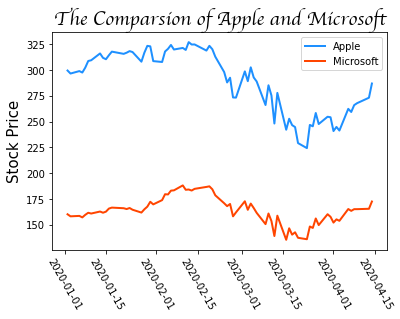

In [10]:
path4 = ("Combination of 10 stocks .xlsx") # The file combined the 10 largest stocks in Dow Jones
ten_stocks = pd.read_excel(path4, parse_dates = ["Date"])
ten_stocks
font1 = {'family' : 'cursive','stretch': 'ultra-condensed', 'weight' : 'normal','size'   : 20,'color':"black"}
plt.plot(ten_stocks["Date"],ten_stocks["AAPL"],lw=2, color = "dodgerblue",label = "Apple")
plt.plot(ten_stocks["Date"],ten_stocks["MSFT"],lw=2, color = "orangered",label = "Microsoft")
plt.legend(loc = 1 )

plt.title("The Comparsion of Apple and Microsoft",font1)
#plt.xlabel("Date",fontsize = 15)
plt.ylabel("Stock Price",fontsize = 15)
plt.xticks(rotation = 300)
plt.show()

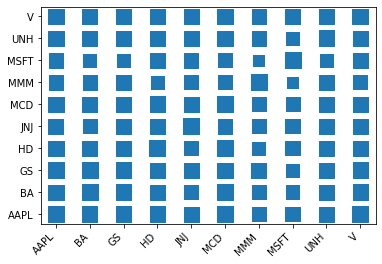

In [11]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 250
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)    
    
    
    
columns = ['MMM', 'GS', 'UNH', 'MSFT', 'HD', 'AAPL','MCD','JNJ','BA','V'] 
corr = ten_stocks[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

heatmap(x=corr['x'], y=corr['y'],size=corr['value'].abs())


#a.set_size_inches(18.5, 10.5)
#code source:https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

In [12]:
from heatmap import heatmap, corrplot
plt.figure(figsize=(8, 8))
#plt.title("The Correlation matrix of 10 stocks")
corrplot(int(str(ten_stocks.corr()), size_scale= 300))

# change the square to the circle, which is more intuitive to compare the size 

TypeError: 'size_scale' is an invalid keyword argument for int()

<Figure size 576x576 with 0 Axes>

In [ ]:
#cormatrix = ten_stocks.corr()
#cormatrix = np.array(cormatrix)

corr = ten_stocks.corr()
# = float(cormatrix.corr())

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

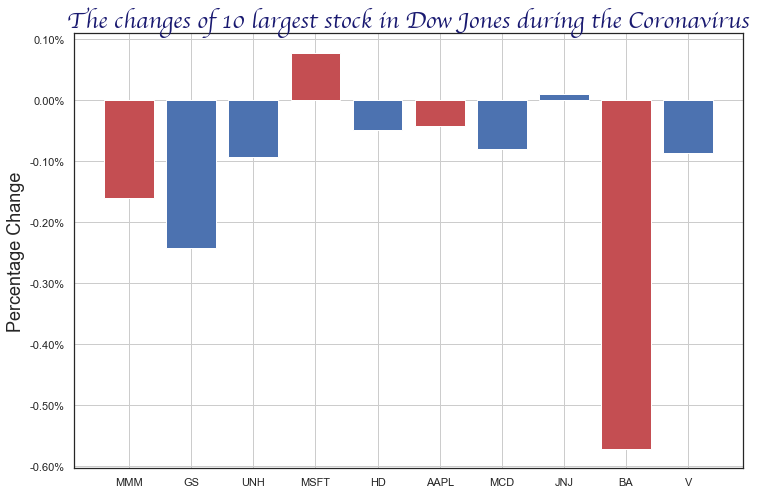

In [15]:
#percentage_change_one_year = {}

#for i in list(ten_stocks.columns):
   # for j in set(ten_stocks.index):
      #  percentage_change_one_year[i]

path5 = "Combination of 10 stocks .xlsx"     
change_in_year = pd.read_excel(path5, 'Sheet1')
name = list(change_in_year.iloc[:,1:11])
values = list(change_in_year.iloc[0,1:11])

#fig = figure(figsize = (12,8))
font1 = {'family' : 'cursive','stretch': 'ultra-condensed', 'weight' : 'normal','size'   : 24,'color':"midnightblue"}

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

#change_in_year['BA'].plot(kind='bar')

#sns.barplot(name, values)

#colors = ["r"] * 12
#colors[10] = "y"

colors = ['r','b','b','r','b','r','b','b','r','b']

plt.bar(name, values,color = colors)
plt.style.use('seaborn-darkgrid')
plt.title("The changes of 10 largest stock in Dow Jones during the Coronavirus",font1)
plt.ylabel("Percentage Change",fontsize = 18)
plt.grid(True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [ ]:
#Based on the period of this outbreak of coronavirus, I found 3M dropped 28% from its price at 2019 4/15, and Boeing sharply 
#dropped 61% from its price at 2019 4/15. However, Apple and Microsoft increased almost 45% during this one year,
#although there are several drops during March 2020. In the next section, I will focus on the factors that effects these 
#two companies: Microsoft and Boeing. I will try to discover some potential reasons in this two companies.

In [ ]:
from stocker import Stocker

In [ ]:
microsoft = Stocker(ticker='AAPL')
# TECHM is in the NSE database
techm = Stocker(ticker='TECHM', exchange='NSE')

In [ ]:
# forecasting the future's price of Boeing


In [ ]:
# Initialize the short and long windows
#Please see my another notebook, which is the code about the forecast of stock price in Boeing company 